In [1]:
#Murat Şahin IBB günlük raylı sistemler analizi ve makine öğrenmesi çalışmasıdır.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibb-age-basedridership-statistics-for-rail-systems/ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar-2023.csv
/kaggle/input/ibb-age-basedridership-statistics-for-rail-systems/2022-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv
/kaggle/input/ibb-age-basedridership-statistics-for-rail-systems/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx


In [1]:
# Let's start

import pandas as pd

file_2022 = '/kaggle/input/ibb-age-basedridership-statistics-for-rail-systems/2022-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv'
file_2023 = '/kaggle/input/ibb-age-basedridership-statistics-for-rail-systems/ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar-2023.csv'

# Let's try a different encoding to handle the UnicodeDecodeError
df_2022 = pd.read_csv(file_2022, encoding='ISO-8859-9')
df_2023 = pd.read_csv(file_2023, encoding='ISO-8859-9')

# Display the first few rows of both dataframes to inspect the structure
df_2022.head(), df_2023.head()


(   passage_cnt  passanger_cnt  transaction_year  transaction_month  \
 0         1687           1656              2022                  1   
 1         2520           2469              2022                  1   
 2         2157           2119              2022                  1   
 3         3163           3085              2022                  1   
 4         1041           1006              2022                  1   
 
    transaction_day                               line station_name  \
 0                1  F1-TAKSIM-KABATAS FUNIKILER HATTI       TAKSIM   
 1                1  F1-TAKSIM-KABATAS FUNIKILER HATTI      KABATAS   
 2                1  F1-TAKSIM-KABATAS FUNIKILER HATTI       TAKSIM   
 3                1  F1-TAKSIM-KABATAS FUNIKILER HATTI      KABATAS   
 4                1  F1-TAKSIM-KABATAS FUNIKILER HATTI      KABATAS   
 
   station_number     town    age  longitude   latitude  
 0        TAK-KBT  Beyoğlu  20-30  28.986444  41.036750  
 1        KTS-TKS  Beyoğlu  

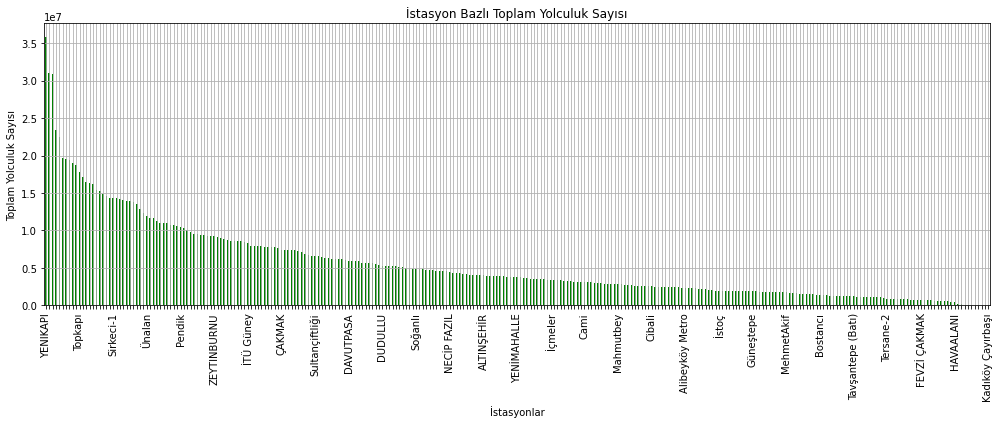

In [5]:
# İstasyon bazında toplam yolculuk sayısı
station_passage_summary = merged_data.groupby('station_name')['passage_cnt'].sum()

# İstasyon bazlı yolculuk sayısı dağılımı
plt.figure(figsize=(14, 6))
station_passage_summary_sorted = station_passage_summary.sort_values(ascending=False)
ax = station_passage_summary_sorted.plot(kind='bar', color='green')

# Sadece her 10 istasyonda bir isim gösterilecek şekilde ayarlıyoruz
xticks_labels = [label if i % 10 == 0 else '' for i, label in enumerate(station_passage_summary_sorted.index)]
ax.set_xticklabels(xticks_labels, rotation=90)

plt.title('İstasyon Bazlı Toplam Yolculuk Sayısı')
plt.xlabel('İstasyonlar')
plt.ylabel('Toplam Yolculuk Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()


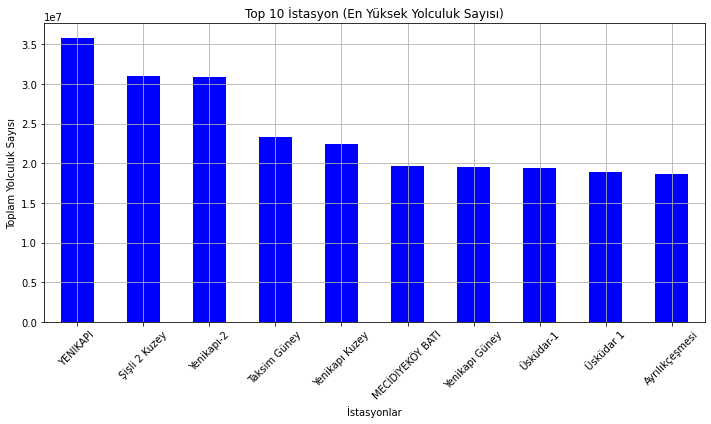

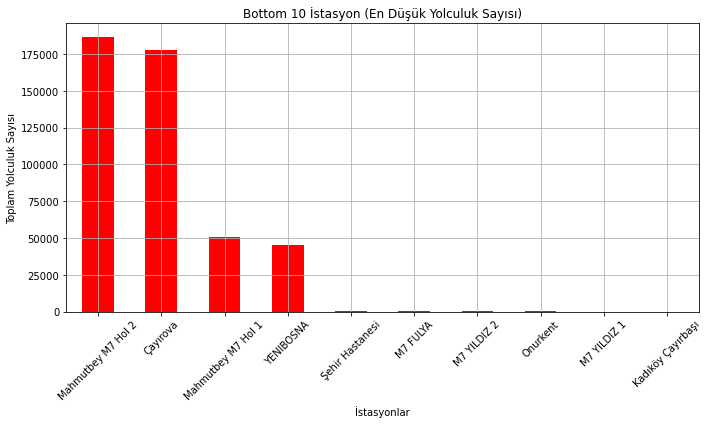

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Verileri birleştirme (df_2022 ve df_2023 daha önce okunmuş olmalı)
merged_data = pd.concat([df_2022, df_2023], ignore_index=True)

# İstasyon bazında toplam yolculuk sayısı
station_passage_summary = merged_data.groupby('station_name')['passage_cnt'].sum()

# İstasyon bazlı yolculuk sayısı sıralaması
station_passage_summary_sorted = station_passage_summary.sort_values(ascending=False)

# Top 10 istasyon - En yüksek yolculuk sayısına sahip olanlar
top_10_stations = station_passage_summary_sorted.head(10)

plt.figure(figsize=(10, 6))
top_10_stations.plot(kind='bar', color='blue')
plt.title('Top 10 İstasyon (En Yüksek Yolculuk Sayısı)')
plt.xlabel('İstasyonlar')
plt.ylabel('Toplam Yolculuk Sayısı')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bottom 10 istasyon - En düşük yolculuk sayısına sahip olanlar
bottom_10_stations = station_passage_summary_sorted.tail(10)

plt.figure(figsize=(10, 6))
bottom_10_stations.plot(kind='bar', color='red')
plt.title('Bottom 10 İstasyon (En Düşük Yolculuk Sayısı)')
plt.xlabel('İstasyonlar')
plt.ylabel('Toplam Yolculuk Sayısı')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


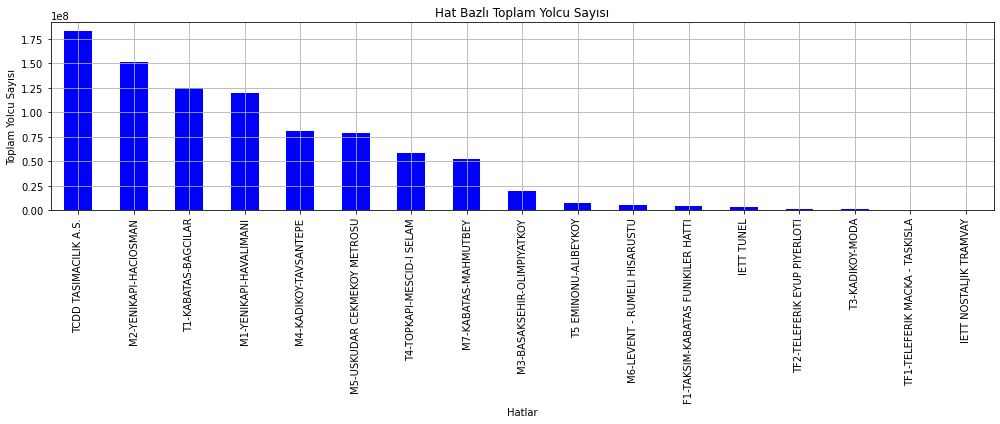

In [11]:
# Tüm hatlar için yolcu sayısı grafiği

# Line bazında toplam yolcu sayısını hesaplayalım
line_passenger_summary = merged_data.groupby('line')['passanger_cnt'].sum()

# Line bazlı yolcu sayısını büyükten küçüğe sıralayalım
line_passenger_summary_sorted = line_passenger_summary.sort_values(ascending=False)

# Tüm hatlar için yolcu sayısı grafiği
plt.figure(figsize=(14, 6))
line_passenger_summary_sorted.plot(kind='bar', color='blue')
plt.title('Hat Bazlı Toplam Yolcu Sayısı')
plt.xlabel('Hatlar')
plt.ylabel('Toplam Yolcu Sayısı')
plt.xticks(rotation=90)  # Hat isimlerinin net görünmesi için döndürelim
plt.grid(True)
plt.tight_layout()
plt.show()


En yoğun hat: TCDD TASIMACILIK A.S.


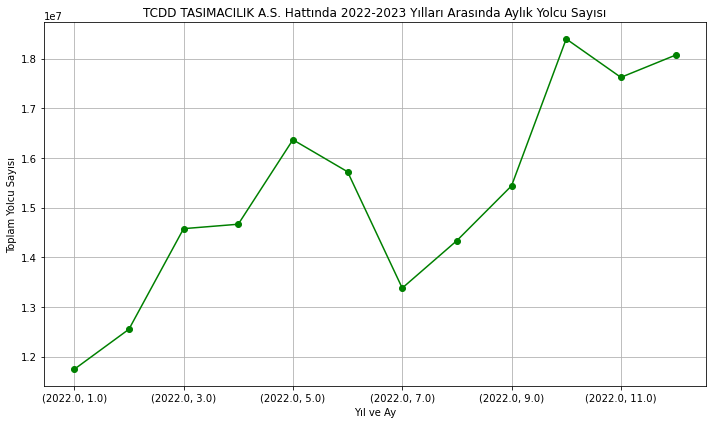

In [15]:
import matplotlib.pyplot as plt

# 1. Veri filtreleme: Sadece 2022 ve 2023 yıllarını alalım
filtered_data = merged_data[merged_data['transaction_year'].isin([2022, 2023])]

# 2. 2022 ve 2023 yılları arasında hat bazında toplam yolcu sayısını hesaplayalım
line_passenger_summary = filtered_data.groupby('line')['passanger_cnt'].sum()

# 3. En yoğun hattı bulalım (en fazla yolcu sayısına sahip hat)
most_busy_line = line_passenger_summary.idxmax()
print(f"En yoğun hat: {most_busy_line}")

# 4. Bu hattın 2022-2023 arasında aylık bazda yolcu sayısını inceleyelim
monthly_passenger_summary = filtered_data[filtered_data['line'] == most_busy_line].groupby(['transaction_year', 'transaction_month'])['passanger_cnt'].sum()

# 5. Aylık değişim grafiği
plt.figure(figsize=(10, 6))
monthly_passenger_summary.plot(kind='line', marker='o', color='green')
plt.title(f'{most_busy_line} Hattında 2022-2023 Yılları Arasında Aylık Yolcu Sayısı')
plt.xlabel('Yıl ve Ay')
plt.ylabel('Toplam Yolcu Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()


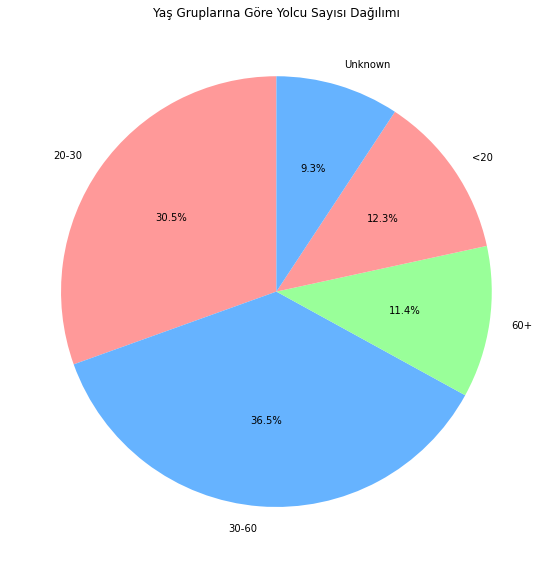

In [16]:
# Yaş gruplarına göre yolcu sayısı dağılımı
age_group_distribution = merged_data.groupby('age')['passanger_cnt'].sum()

# Pasta grafiği ile yaş grubu dağılımı
plt.figure(figsize=(8, 8))
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Yaş Gruplarına Göre Yolcu Sayısı Dağılımı')
plt.ylabel('')  # Y eksenini gizleyelim
plt.tight_layout()
plt.show()


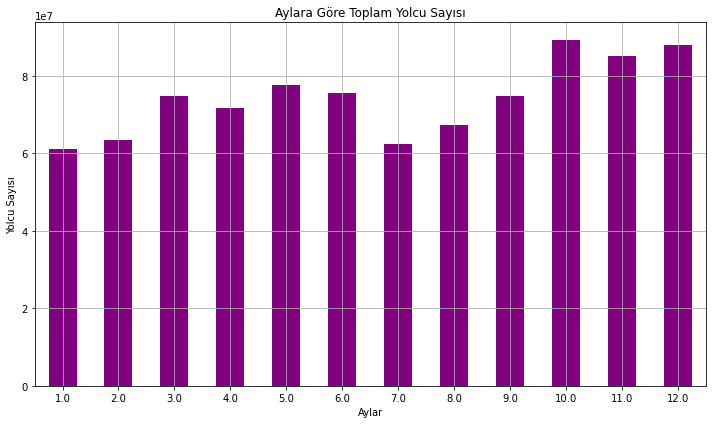

In [17]:
# Aylara göre toplam yolcu sayısı
monthly_passanger_summary = merged_data.groupby('transaction_month')['passanger_cnt'].sum()

# Aylık yolcu sayısı dağılımı
plt.figure(figsize=(10, 6))
monthly_passanger_summary.plot(kind='bar', color='purple')
plt.title('Aylara Göre Toplam Yolcu Sayısı')
plt.xlabel('Aylar')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
